In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

In [3]:
df = pd.read_csv('Project_Data/AQI By State 1980-2022.csv')

In [4]:
df.head(50)

,Geo_Loc,Year,State,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,POINT (-86.63186076199969 32.84057112200048),1980,Alabama,3900368,67,7,1382,1180,1169,213,...,8,0,1282,774,314,240,334,808,0,0
1,POINT (-147.72205903599973 64.84507995700051),1980,Alaska,405315,30,4,1184,280,1099,85,...,16,0,586,306,132,732,121,331,0,0
2,POINT (-111.76381127699972 34.865970280000454),1980,Arizona,2737774,15,7,1866,696,1561,305,...,7,0,1078,678,355,721,151,994,0,0
3,POINT (-92.27449074299966 34.74865012400045),1980,Arkansas,2288738,75,1,366,0,320,46,...,1,0,202,115,38,0,29,337,0,0
4,POINT (-120.99999953799971 37.63864012300047),1980,California,23800800,58,41,13728,1278,11221,2507,...,725,4,7869,4771,2215,1763,3685,8280,0,0
5,POINT (-106.13361092099967 38.843840757000464),1980,Colorado,2908803,64,10,3477,183,3226,251,...,10,0,1584,769,435,1801,406,1270,0,0
6,POINT (-72.64984095199964 41.56266102000046),1980,Connecticut,3113174,8,6,1505,691,1032,473,...,143,0,1603,1076,380,542,84,879,0,0
7,POINT (-75.57774116799965 39.008830667000495),1980,Delaware,594919,3,3,632,466,501,131,...,8,0,626,394,154,60,183,389,0,0
8,POINT (-77.036871 38.907192),1980,District Of Columbia,638284,1,1,366,0,288,78,...,9,0,234,147,47,138,104,124,0,0
9,POINT (-81.92896053899966 28.932040377000476),1980,Florida,9839835,67,13,4011,747,3770,241,...,3,0,2237,960,487,892,332,2787,0,0


In [5]:
df.columns

Index(['Geo_Loc', 'Year', 'State', 'Pop_Est', 'TTL_Cnty', 'Cnty_Rpt',
       'Dys_w_AQI', 'Dys_NM', 'Dys_Blw_Thr', 'Dys_Abv_Thr', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [6]:
df.describe()

,Year,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,Good Days,Moderate Days,...,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
count,2193.000000,2.193000e+03,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,...,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000
mean,2001.000000,5.527642e+06,61.647059,17.742362,4901.950752,1578.459188,4683.177839,218.772914,3627.003648,1056.174191,...,10.651619,0.557228,2460.258550,1233.401277,664.378021,234.519836,338.196990,2828.772458,1139.006384,361.455084
std,12.412504,6.224554e+06,46.329079,12.081374,3685.060806,1485.129269,3475.250368,372.963855,2653.594956,1000.916526,...,47.937858,3.622030,2449.794111,1002.790742,521.405966,379.147957,566.039189,2484.622552,1656.657306,505.630360
min,1980.000000,1.791420e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1990.000000,1.391802e+06,23.000000,9.000000,2143.000000,469.000000,2044.000000,23.000000,1611.000000,322.000000,...,0.000000,0.000000,988.000000,504.000000,294.000000,1.000000,25.000000,869.000000,0.000000,7.000000
50%,2001.000000,3.695459e+06,62.000000,15.000000,3918.000000,1164.000000,3767.000000,85.000000,2991.000000,781.000000,...,0.000000,0.000000,1922.000000,964.000000,528.000000,39.000000,122.000000,2070.000000,353.000000,191.000000
75%,2012.000000,6.461587e+06,88.000000,24.000000,7023.000000,2236.000000,6717.000000,260.000000,5215.000000,1418.000000,...,5.000000,0.000000,3252.000000,1669.000000,905.000000,335.000000,398.000000,4307.000000,1723.000000,491.000000
max,2022.000000,3.950165e+07,254.000000,56.000000,19255.000000,9504.000000,18192.000000,3123.000000,13139.000000,6865.000000,...,725.000000,83.000000,34234.000000,5938.000000,2838.000000,3339.000000,3837.000000,13642.000000,9184.000000,3363.000000


In [14]:
import plotly.express as px

df[['Useless', 'Latitude', 'Longitude']] = df['Geo_Loc'].str.split(' ', expand=True)
df['Latitude'] = df['Latitude'].str.slice(1)
df['Longitude'] = df['Longitude'].str.slice(stop=-1)
df.drop(columns='Useless')
df

,Geo_Loc,Year,State,Pop_Est,TTL_Cnty,Cnty_Rpt,Dys_w_AQI,Dys_NM,Dys_Blw_Thr,Dys_Abv_Thr,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,Useless,Latitude,Longitude
0,POINT (-86.63186076199969 32.84057112200048),1980,Alabama,3900368,67,7,1382,1180,1169,213,...,774,314,240,334,808,0,0,POINT,-86.63186076199969,32.84057112200048
1,POINT (-147.72205903599973 64.84507995700051),1980,Alaska,405315,30,4,1184,280,1099,85,...,306,132,732,121,331,0,0,POINT,-147.72205903599973,64.84507995700051
2,POINT (-111.76381127699972 34.865970280000454),1980,Arizona,2737774,15,7,1866,696,1561,305,...,678,355,721,151,994,0,0,POINT,-111.76381127699972,34.865970280000454
3,POINT (-92.27449074299966 34.74865012400045),1980,Arkansas,2288738,75,1,366,0,320,46,...,115,38,0,29,337,0,0,POINT,-92.27449074299966,34.74865012400045
4,POINT (-120.99999953799971 37.63864012300047),1980,California,23800800,58,41,13728,1278,11221,2507,...,4771,2215,1763,3685,8280,0,0,POINT,-120.99999953799971,37.63864012300047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,POINT (-78.45789046299967 37.54268067400045),2022,Virginia,8683619,134,32,5351,6329,5347,4,...,1379,1008,336,521,3015,1369,110,POINT,-78.45789046299967,37.54268067400045
2189,POINT (-120.47001078999972 47.52227862900048),2022,Washington,7785786,39,30,6276,4674,6262,14,...,1242,687,1,23,1352,4714,186,POINT,-120.47001078999972,47.52227862900048
2190,POINT (-80.71264013499967 38.66551020200046),2022,West Virginia,1775156,55,14,2119,2991,2118,1,...,714,493,2,0,1244,711,162,POINT,-80.71264013499967,38.66551020200046
2191,POINT (-89.81637074199966 44.39319117400049),2022,Wisconsin,5892539,72,29,6660,3925,6608,52,...,1613,1062,2,2,4683,1959,14,POINT,-89.81637074199966,44.39319117400049


In [7]:
CancerData = pd.read_excel('Project_Data/cancer patient data sets.xlsx')


In [8]:
CancerData.head

<bound method NDFrame.head of     Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0           P1   33       1              2            4             5   
1          P10   17       1              3            1             5   
2         P100   35       1              4            5             6   
3        P1000   37       1              7            7             7   
4         P101   46       1              6            8             7   
..         ...  ...     ...            ...          ...           ...   
995       P995   44       1              6            7             7   
996       P996   37       2              6            8             7   
997       P997   25       2              4            5             6   
998       P998   18       2              6            8             7   
999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0            

In [9]:
CancerData.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

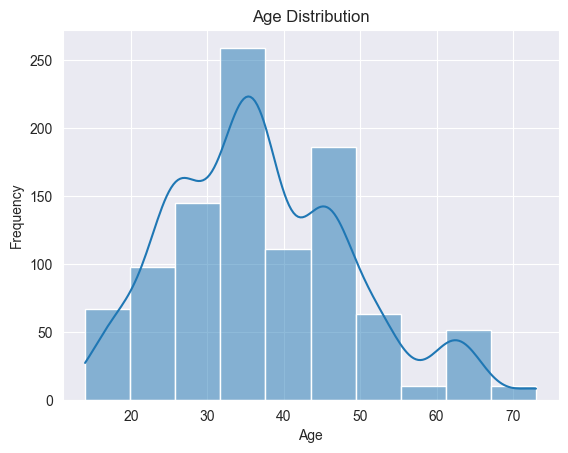

In [12]:
sns.histplot(CancerData['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


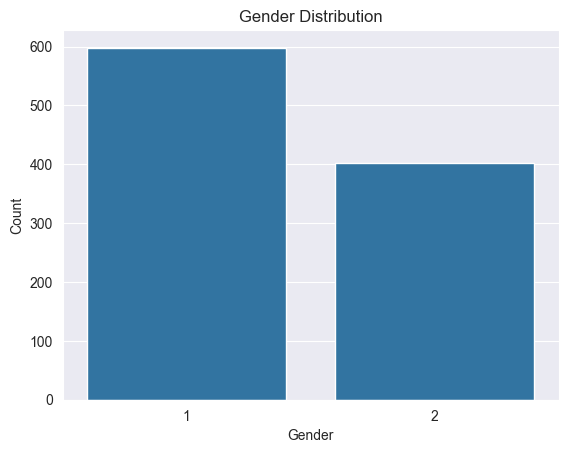

In [13]:
sns.countplot(x='Gender', data=CancerData)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


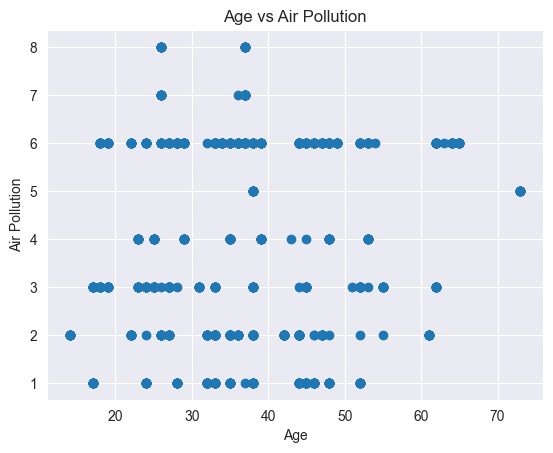

In [16]:
plt.scatter(CancerData['Age'], CancerData['Air Pollution'])
plt.title('Age vs Air Pollution')
plt.xlabel('Age')
plt.ylabel('Air Pollution')
plt.show()


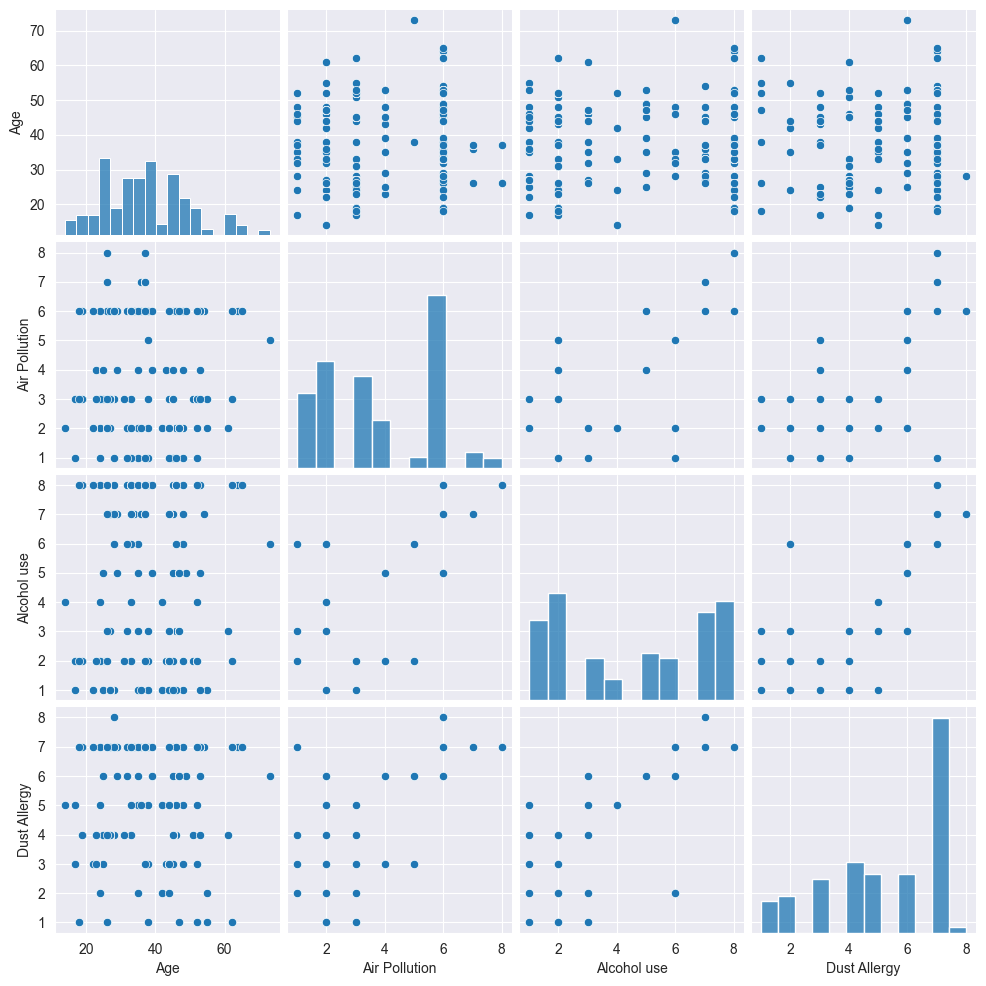

In [17]:
sns.pairplot(CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy']])
plt.show()


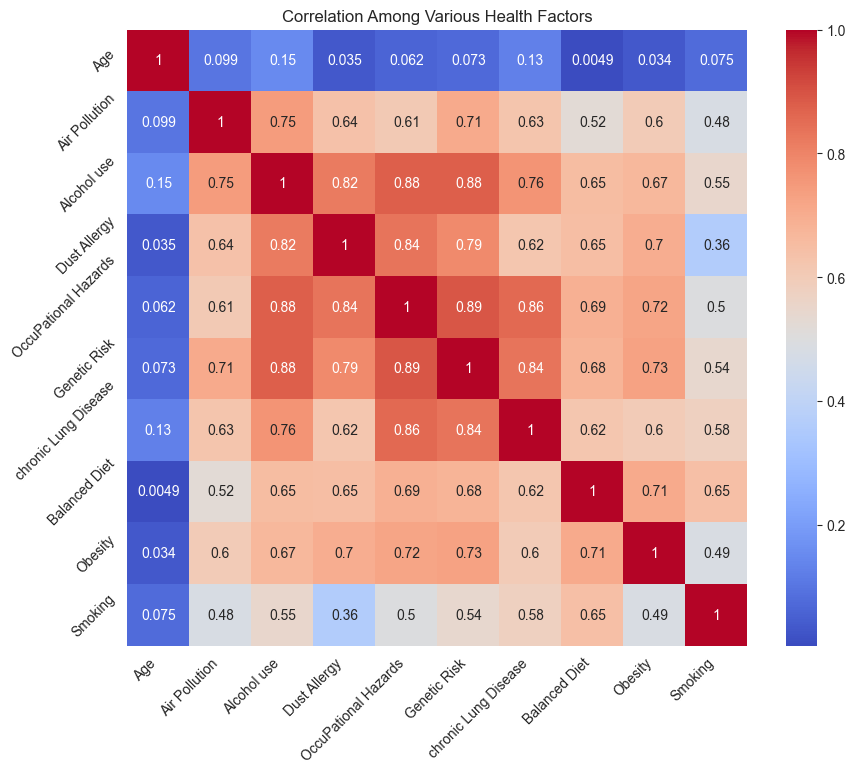

In [18]:
plt.figure(figsize=(10, 8))
corr = CancerData[['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Various Health Factors')
plt.xticks(rotation=45, ha='right')  # Improve readability of x-axis labels
plt.yticks(rotation=45)  # Improve readability of y-axis labels
plt.show()


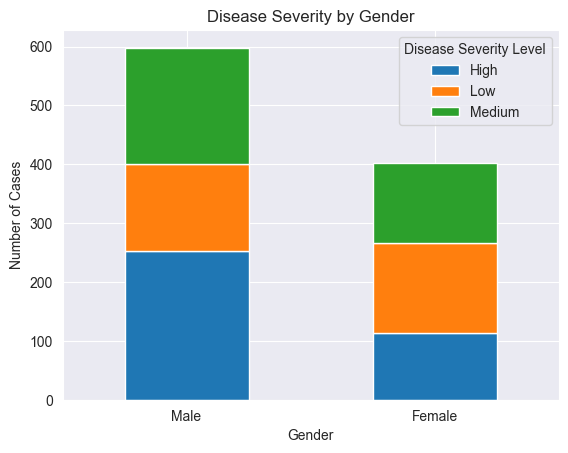

In [19]:
# more tables
pd.crosstab(CancerData['Gender'], CancerData['Level']).plot(kind='bar', stacked=True)
plt.title('Disease Severity by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)  # Adjust as necessary
plt.legend(title='Disease Severity Level')
plt.show()
